In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
flights_dframe = sns.load_dataset('flights')

In [3]:
flights_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flights_dframe.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [5]:
flights_dframe = flights_dframe.pivot('month','year','passengers')

In [6]:
flights_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


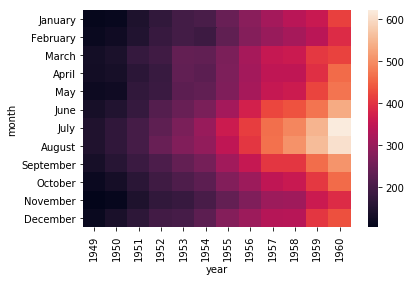

In [7]:
sns.heatmap(flights_dframe)

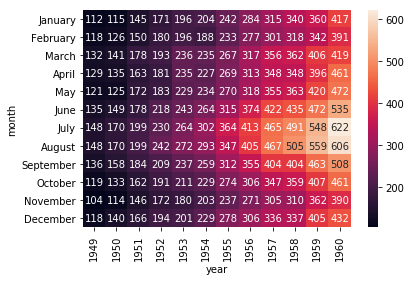

In [8]:
sns.heatmap(flights_dframe,annot=True,fmt='d')

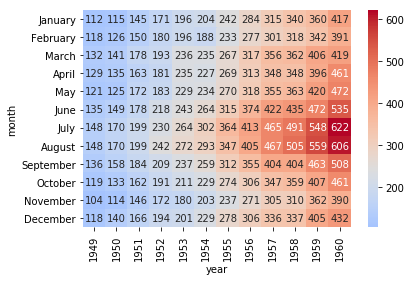

In [10]:
sns.heatmap(flights_dframe,annot=True,fmt='d',center=flights_dframe.loc['January',1955],cmap = 'coolwarm')

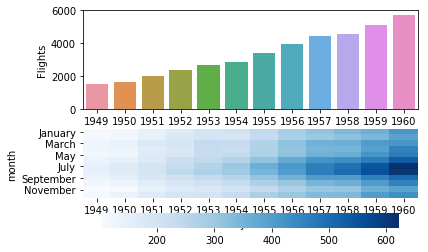

In [13]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flights_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flights_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})


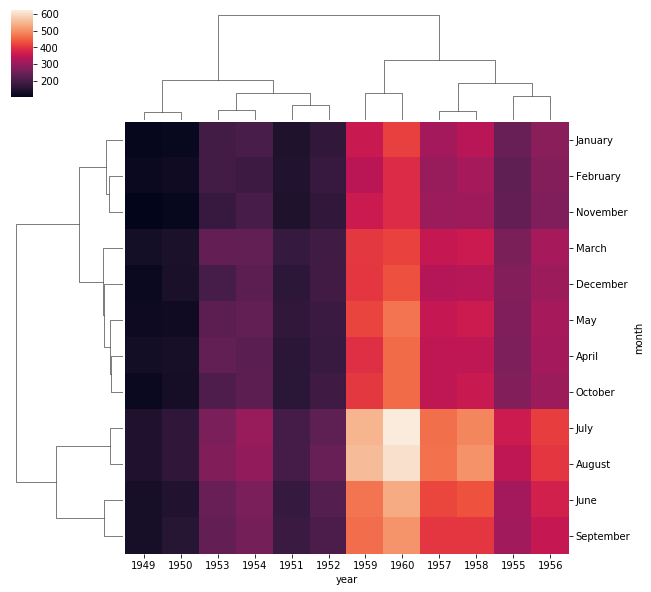

In [14]:
sns.clustermap(flights_dframe)

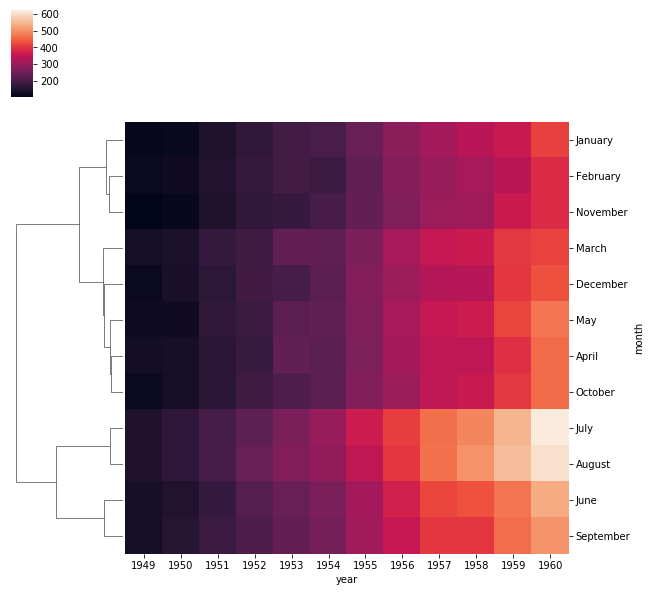

In [15]:
sns.clustermap(flights_dframe,col_cluster=False)

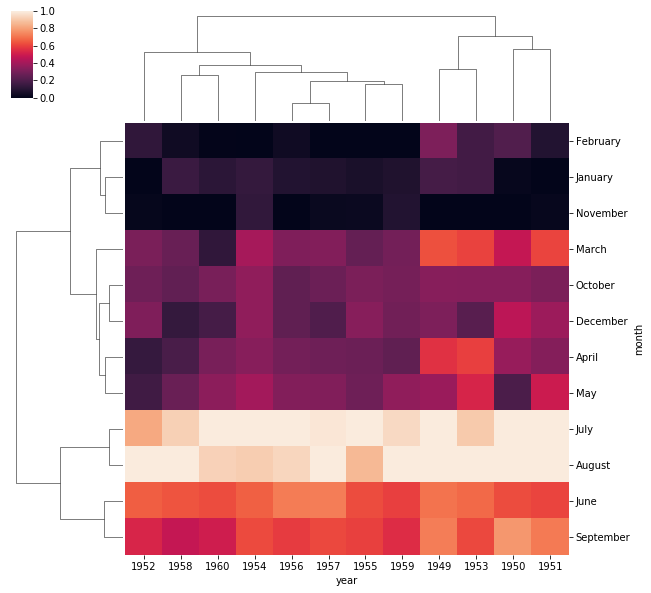

In [16]:
sns.clustermap(flights_dframe,standard_scale=1)

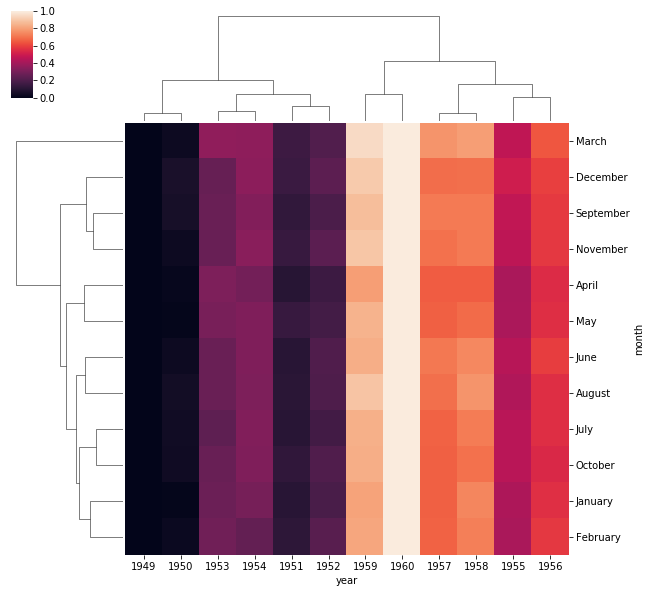

In [17]:
sns.clustermap(flights_dframe,standard_scale=0)

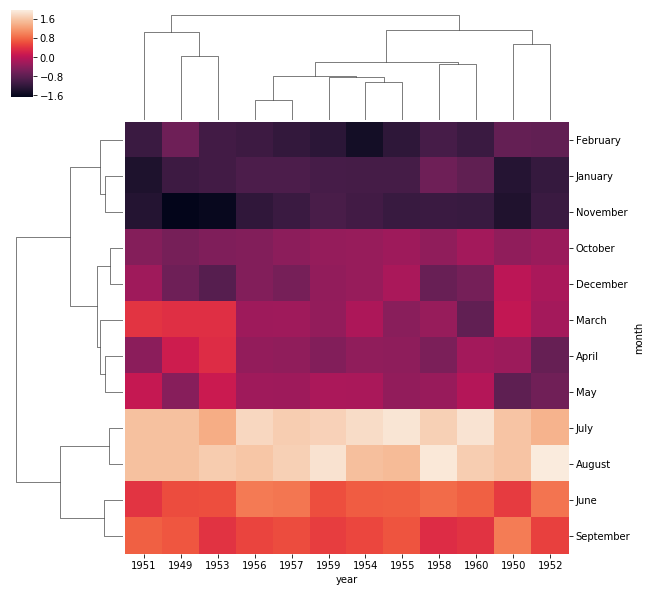

In [18]:
sns.clustermap(flights_dframe,z_score=1)